# Capitulo 4: Aspectos básicos do NumPy: arrays e computação vetorizada
-------------------------------------------------------------------------

- **`ndarray`**, um eficiente array multidimensional que fornece operações aritméticas rápidas baseadas em arrays e recursos flexíveis de **broadcasting**. Ele é um contêiner rápido e flexível para grandes conjuntos de dados em Python.

In [1]:
import numpy as np
data = np.array([[1.5,-0.1,3],[0,-3,6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [2]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [3]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

>Um ndarray é um contêiner multidimensional genérico para dados homogêneos; isto é, todos os elementos devem ser do mesmo tipo.

>shape: Uma tupla que indica o tamanho de cada dimensão, e um dtype, um objeto que descreve o tipo de dado do array

In [4]:
data.shape

(2, 3)

In [5]:
data.dtype

dtype('float64')

A maneira mais fácil de criar um array é usando a função **`array`**.

In [7]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Sequências aninhadas, como uma lista de listas de mesmo tamanho, serão convertidas em um array multidimensional

In [9]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Já que `data2` era uma lista de listas, o array NumPy `arr2` tem duas dimensões, com a forma sendo inferida a partir dos dados. Podemos confirmar isso inspecionando os atributos `rdim` e `shape`

In [12]:
arr2.ndim

2

In [13]:
arr2.shape

(2, 4)

`numpy.zeros` e `numpy.ones` criam arrays de 0s ou 1s.
`numpy.empty` cria um array sem inicializá-lo com nenhum valor específico.

In [14]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((2,3,2))

# Essa função retorna memória não inicializada e, portanto, pode conter "lixo" com valores diferentes de zero. Você só deve usá-la se quiser preencher
# o novo array com dados.

array([[[8.18682324e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 9.41822545e-067]],

       [[6.37722550e-067, 2.65259513e-032],
        [4.90751422e-062, 3.44267915e+175],
        [2.77489122e+180, 4.08536709e-033]]])

`numpy.arange` é uma versão da função interna Python `range` cujo valor é um array:

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [24]:
#dtype
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int32')

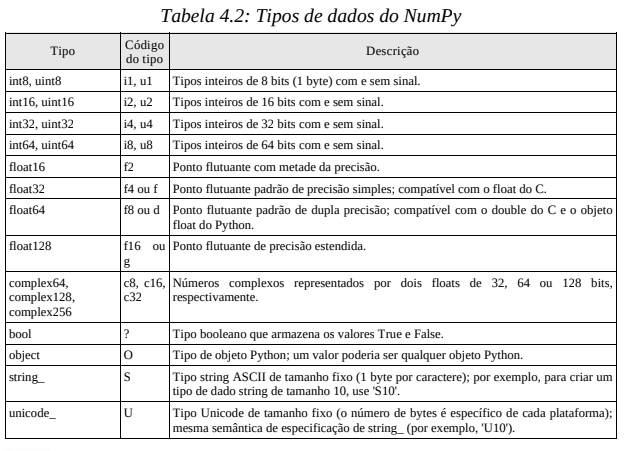

Você pode converter ou executar o casting de um array de um tipo de dado para outro de maneira explícita usando o método `astype` do ndarray:

In [26]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [27]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [28]:
float_arr.dtype

dtype('float64')

Se fizer o casting de alguns números de ponto flutuante para o tipo de dado inteiro, a parte decimal será truncada:

In [29]:
arr = np.array([3.7, -1.2, -2.6, 0.5,12.9,10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [30]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

### Aritmética com arrays NumPy

Os arrays são importantes porque permitem expressar operações em lote com os dados sem ser preciso escrever nenhum loop `for`. Isso se chama *vetorização*

In [36]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [37]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [38]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

As operações aritméticas com escalares propagam o argumento escalar para cada elemento do array:

In [39]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr **2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

As comparações entre arrays de mesmo tamanho geram arrays booleanos:

In [42]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [43]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Indexação e fatiamento básicos

Os arrays unidimensionais são simples; superficialmente eles se comportam de modo semelhante às listas Python:

In [2]:
import numpy as np

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
arr[5]

np.int64(5)

In [5]:
arr[5:8]

array([5, 6, 7])

In [7]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

### Indexação com fatias

Os *ndarrays* podem ser fatiados com a sintaxe conhecida a seguir:

In [8]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [9]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

### Indexação booleana

Consideraremos um exemplo no qual temos alguns dados em um array e um array de nomes com duplicidades:

In [10]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4,7],[0,2],[-5,6],[0,0],[1,2],[-12,-4],[3,4]])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [11]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Suponhamos que cada nome correspondesse a uma linha do array `data` e quiséssemos selecionar todas as linhas cujo nome correspondente fosse "Bob".
Como as operações aritméticas, as comparações (como com `==`) com arrays também são vetorizadas. Logo, comparar `names` com a string "bob" gera um array booleano:

In [12]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

Esse array booleano pode ser passado quando o array for indexado:

In [13]:
data[names == 'Bob']

array([[4, 7],
       [0, 0]])

O array booleano deve ter o mesmo tamanho do eixo de array que ele está indexando. Você pode até mesmo combinar arrays booleanos com fatias ou inteiros (ou sequências de inteiros).

Neste exemplos, estou fazendo a seleção nas linhas em que `names == "Bob"` e também estou indexando as colunas:

In [14]:
data[names == 'Bob', 1:]

array([[7],
       [0]])

In [15]:
data[names == 'Bob', 1]

array([7, 0])

Para selecionar tudo, exceto "Bob", você pode usar `!=` ou negar a condição utilizando `~`:

In [16]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [17]:
~(names == 'Bob')

array([False,  True,  True, False,  True,  True,  True])

In [18]:
data[~(names == 'Bob')]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

O operador `~` pode ser útil quando você quiser inverter um array booleano referenciado por uma variável:

In [19]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

A definição de valores com arrays booleanos funciona pela transferência do valor ou dos valores que estiverem no lado direito para os locais em que os valores do array booleano forem `True`. Para configurar todos os valores negativos de `data`com 0, só precisamos fazer o seguinte:

In [20]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

Você também pode definir linhas ou colunas inteiras usando um array booleano unidimensional:

In [21]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

> Esses tipos de operações com dados bidimensionais são mais convenientes com o pandas.

### Indexação sofisticada

*Indexação sofisticada (fancy indexing)* é um termo adotado pelo NumPy para descrever a indexação com o uso de arrays de inteiros.

In [22]:
arr = np.zeros((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Para selecionar um subconjunto das linhas em uma ordem específica, basta passar uma listaa ou um ndarray de inteiros especificando a ordem desejada:

In [23]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Usar índices negativos seleciona as linhas a partir do final:

In [24]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passar arrays com vários índices produz um resultado um pouco diferente; é selecionado um array unidimensional de elementos correspondentes a cada tupla de índices:

In [25]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [26]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

Aqui os elementos `(1,0), (5,3), (7,1)` e `(2,2)` foram selecionados. O resultado da indexação sofisticada com um número de arrays de inteiros equivalente ao número de eixos é sempre unidimensional.

> Lembre-se de que a indexação sofisticada, ao contrário do fatiamento, sempre copia os dados em um novo array ao atribuir o resultado a uma nova variável.

### Transposição de arrays e troca de eixos

A transposição é uma forma especial de reformatação que também retorna uma visualização dos dados subjacentes, sem fazer nenhuma cópia. Os arrays têm o método **`transpose`** e o atributo especial **`T`**:

In [27]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [28]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Ao fazer cálculos com matrizes, talvez você use esse recurso com alguma frequência - por exemplo, ao calcular o produto da matriz interna usando

`
numpy.dot
`

In [29]:
arr = np.array([[0,1,0],[1,2,-2],[6,3,2],[-1,0,-1],[1,0,1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [30]:
np.dot(arr.T,arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

O operador infixo @ é outra maneira para fazermos a multiplicação de matrizes:

In [32]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

A transposição simples com `.T` é um caso especial de troca de eixos. O ndarray tem o método **`swapaxes`**, que recebe um par de números de eixos e troca os eixos indicados para reorganizar os dados:

In [33]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [34]:
arr.swapaxes(0,1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

> **`swapaxes`** também retorna uma visualização dos dados sem fazer cópia.

## 4.2 Geração de números pseudoaleatórios

O módulo `numpy.random` complementa o módulo `random` interno do Python para a geração eficiente de arrays de inteiros com valores de amostras de muitos tipos de distribuições de probabilidade. Por exemplo, você pode obter uma array 4 x 4 de amostras da distribuição normal padrão usando **`numpy.random.standard_normal`**:

In [2]:
import numpy as np

In [3]:
samples = np.random.standard_normal(size=(4,4))
samples

array([[-1.59623335,  0.27029066, -0.0338063 , -0.24857593],
       [ 0.48915966,  0.34455605, -0.19191209,  0.34426066],
       [-0.25226832,  1.24637606,  0.84227442, -1.3831278 ],
       [ 0.37642228,  0.50346393,  1.03018286,  0.28929247]])

Em contrapartida, o módulo `random` interno do Python só obtém a amostra de um valor de cada vez. Como você pode ver nesse benchmark, `numpy.random` é acima de uma ordem de grandeza mais rápido para a geração de amostras muito grandes:

In [10]:
from random import normalvariate

In [11]:
N = 1_000_000

In [12]:
%timeit samples = [normalvariate(0,1)for_in_range(N)]
1.05 s +- 14.5 ms per loop (mean +- std.dev. of 7 runs, 1 loop each)

SyntaxError: invalid syntax (1361334054.py, line 2)

In [13]:
%timeit np.random.standard_normal(N)
21.8 ms +- 212 us per loop (mean +- std. dev. of 7 runs, 10 loops each)

SyntaxError: invalid syntax (2624655524.py, line 2)

Esses números aleatórios não são realmente aleatórios (são pseudoaleatórios);
eles são criados por um gerador de números aleatórios configurável que define deterministicamente que valores serão criados. Funções como `numpy.random.standard_normal` usam o gerador de números aleatórios padrão do módulo `numpy.random`, mas o código pode ser configurado para usar um gerador explícito:

In [14]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2,3))

O argumento `seed` é que determina o estado inicial do gerador e o estado muda sempre que o objeto `rng` é usado para gerar dados. O objeto gerador `rng` também fica isolado de qualquer outro código que possa usar o módulo `numpy.random`:

In [15]:
type(rng)

numpy.random._generator.Generator

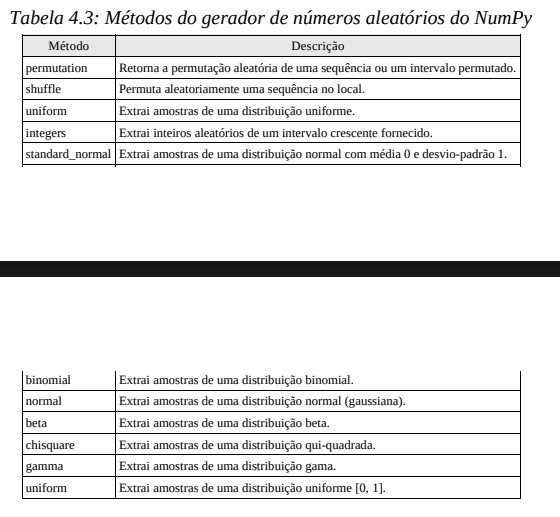

## 4.3 Funções universais: funções rápidas de arrays para todos os elementos

> Uma função universal (universal function), ou ufunc, é aquela que executa operações em todos os elementos dos dados dos ndarrays. Podemos considerá-las como encapsuladores (wrappers) vetorizados rápidos para funções simples que recebem um ou mais valores escalares e produzem um ou mais resultados escalares.

Muitas ufuncs são transformações simples em todos os elementos, como as de `numpy.sqrt` ou `numpy.exp`:

In [6]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [8]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Essas funções são chamadas de *ufuncs unárias*. Outras, como `numpy.add` ou `numpy.maximum`, recebem dois arrays (logo, são ufuncs binárias) e retornam um único array como resultado:

In [16]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [17]:
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [18]:
np.maximum(x,y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

As *unfuncs* aceitam um argumento opcional `out` que as permite atribuir seus resultados a um array existente em vez de criarem um novo array:

In [19]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
out = np.zeros_like(arr)
np.add(arr,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
np.add(arr,1,out=out)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
out

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

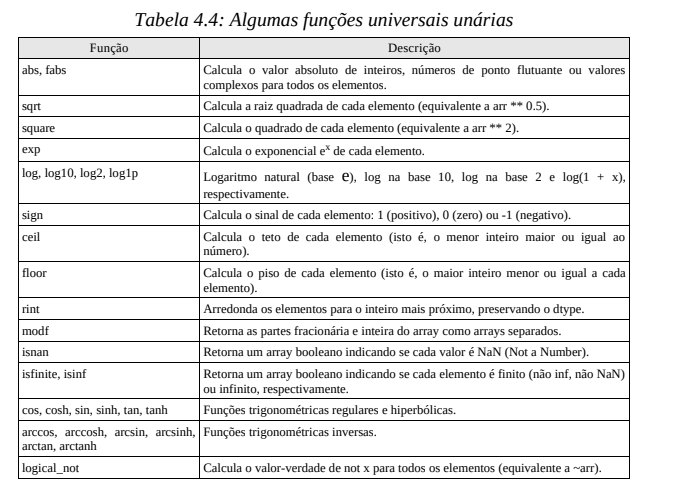
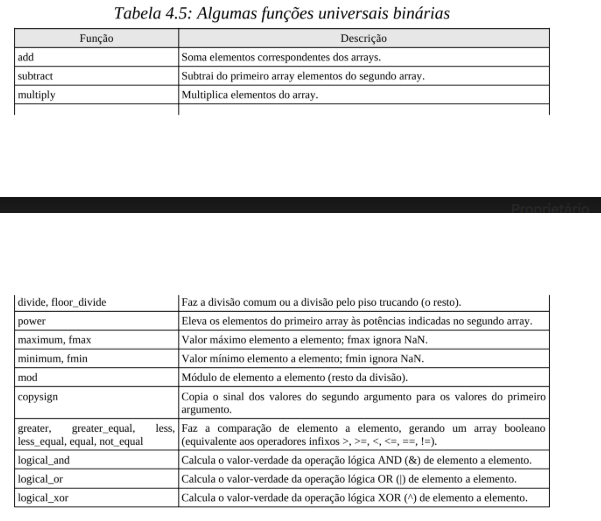

## 4.4 Programação orientada a arrays

Usar arrays NumPy permite expressar muitos tipos de tarefas de processamento de dados como expressões concisas comm arrays, o que de outra forma demandaria a criação de loops. Essa prática de substituir loops explícitos por expressões de arrays é chamada por algumas pessoas de vetorização. Em geral, as operações vetorizadas com arrays são significativamente mais rápidas do que suas equivalentes em Python puro, afetando com maior impacto qualquer tipo de computação numérica.

### Expressão da lógica condicional como operações com arrays

A função `numpy.where` é uma versão vetorizada da expressão ternária `x if condition else y`.

In [9]:
import numpy as np

In [10]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True, False, True, True, False])

Com `numpy.where`, podemos fazer isso com uma única chamada de função:

In [11]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

`np.where` (if-else com arrays)

A função `np.where`(condição, valor_se_verdadeiro, valor_se_falso)
funciona como um if-else vetorizado.

O segundo e o terceiro argumentos de `numpy.where` não precisam ser arrays; um deles ou ambos podem ser escalares. Um uso típico de `where` em análise de dados é para a produção de um novo array de valores baseado em outro array. Suponhamos que você tivesse uma matriz de dados gerados aleatoriamente e quisesse substituir todos os valores positivos por 2 e todos os valores negativos por -2. É possível fazer isso com `numpy.where`:

In [ ]:
arr = rng.standard_normal((4,4))
arr

Você pode combinar escalares e arrays quando usar `numpy.where`. Por exemplo, posso substituir todos os valores positivos de `arr` pela constante 2, desta forma:

In [ ]:
np.where(arr > 0,2,arr) # configura apenas os valores positivos com 2

### Métodos matemáticos e estatísticos

> Um conjunto de funções matemáticas que calculam estatísticas sobre um array inteiro ou sobre os dados existentes ao longo de um eixo podem ser acessadas como métodos da classe array. Você pode usar agregações (que também são chamadas de reduções) como `sum`,`mean` e `std`(desvio-padrão) chamando o método de instância do array ou usando a função de nível superior do NumPy. Quando usar a função do NumPy, como numpy.sum, terá de passar o array que deseja agregar como primeiro argumento.

A seguir, gerarei alguns dados aleatórios distribuídos normalmente e calcularei estatísticas de agregação:

In [ ]:
rng = np.random.default_rng()
arr = rng.standard_normal((5,4))
arr

In [ ]:
np.mean(arr)

In [ ]:
arr.sum()

Funções como `mean` e `sum` aceitam um argumento opcional `axis` que calcula a estatística no eixo fornecido, resultando em um array com menos uma dimensão:

In [ ]:
arr.mean(axis=1)

In [ ]:
arr.sum(axis=0)

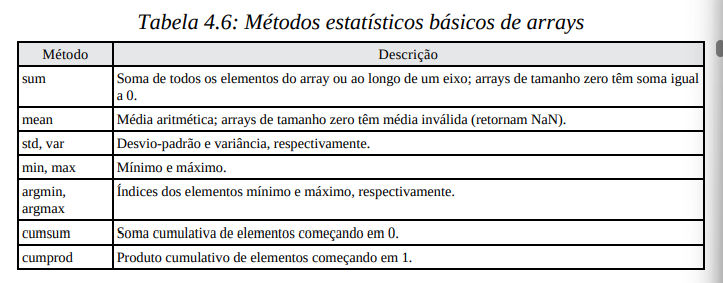

### Métodos para arrays booleanos

Os valores booleanos estão sujeitos à coerção para 1 (True) e 0 (False) nos métodos anteriores.
Logo, com frequência `sum` é usado como um meio de contar valores `True` em um array booleano:

In [ ]:
arr = rng.standard_normal(100)
(arr > 0).sum #Número de valores positivos
(arr <= 0).sum() #Número de valores não positivos

Os parênteses da expressão `(arr > 0).sum()` são necessários para podermos chamar `sum()` no resultado temporário de `arr>0`.

Dois métodos adicionais, `any` e `all`, são úteis principalmente para arrays booleanos. `any` verifica se um ou mais valores de um array são True, enquanto `all` verifica se todos os valores são `true`:

In [ ]:
bools = np.array([False,False,True,False])
bools.any()

In [ ]:
bools.all()

### Ordenação

Os arrays NumPy podem ser ordenados diretamente no local com o método `sort`:

In [15]:
import numpy as np
rng = np.random.default_rng()

In [16]:
arr = rng.standard_normal(6)
arr

array([ 0.32392936,  1.2159192 ,  0.18101407, -0.05037456, -0.84322464,
        0.54123508])

In [19]:
arr.sort()
arr

array([-0.84322464, -0.05037456,  0.18101407,  0.32392936,  0.54123508,
        1.2159192 ])

ordena cada seção unidimensional de valores de um array multidimensional ao longo do eixo passando o número deste para `sort`.

In [20]:
arr = rng.standard_normal((5,3))
arr

array([[-0.924738  ,  0.35572758,  1.21214876],
       [-0.28440844,  1.7829634 , -1.17210472],
       [ 0.16623979,  0.80911842, -0.68348163],
       [-0.02588576,  0.66623163, -0.93303074],
       [-2.71726569,  1.14102065, -0.24242103]])

`arr.sort(axis=0)` ordena os valores dentro de cada coluna, enquanto `arr.sort(axis=1)` faz ordenação ao longo de cada linha:

In [21]:
arr.sort(axis=0)
arr

array([[-2.71726569,  0.35572758, -1.17210472],
       [-0.924738  ,  0.66623163, -0.93303074],
       [-0.28440844,  0.80911842, -0.68348163],
       [-0.02588576,  1.14102065, -0.24242103],
       [ 0.16623979,  1.7829634 ,  1.21214876]])

In [22]:
arr.sort(axis=1)
arr

array([[-2.71726569, -1.17210472,  0.35572758],
       [-0.93303074, -0.924738  ,  0.66623163],
       [-0.68348163, -0.28440844,  0.80911842],
       [-0.24242103, -0.02588576,  1.14102065],
       [ 0.16623979,  1.21214876,  1.7829634 ]])

### Unicidade e outras lógicas de conjuntos

`numpy.unique` retorna os valores únicos ordenados de um array:

In [23]:
names = np.array(["Bob","Will","Joe","Bob","Will","Joe","Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [24]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

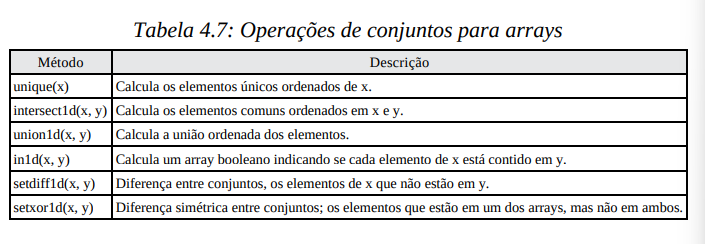

## 4.5 Entrada e saída de arquivos com arrays 

O NumPy pode salvar e carregar dados de e para o disco em algum formato de texto ou binário.

`numpy.save` e `numpy.load` são as duas principais funções de trabalho para o salvamento e o carregamento eficientes de dados de arrays em disco. Os arrays são salvos por padrão em um formato binário bruto descompactado com a extensão de arquivo .npy:

In [26]:
arr = np.arange(10)
np.save("some_array",arr)

In [27]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
numpy.savez("array_arquive.npz",a=arr,b=arr)

No carregamento de um arquivo .npz, você obterá um objeto de tipo
dicionário que carregará os arrays individuais em modo lazy (preguiçoso):

In [ ]:
arch = np.load("array_archive.npz")
arch["b"]

Se seus dados apresentarem uma boa compactação, pode ser melhor usar
`numpy.savez_compressed`:

In [ ]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

## 4.6 Álgebra linear

A multiplicação de dois arrays bidimensionais com * corresponde ao produto de todos os elementos, enquanto as multiplicações de matrizes requerem o uso de uma função. Logo, existe uma função `dot`, que é tanto um método de array quanto uma função do namespace `numpy`, para a multiplicação de matrizes:

In [1]:
import numpy as np

In [2]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [3]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [4]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`x.dot(y)` é equivalente a `np.dot(x,y)`:

In [5]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

Um produto de matrizes entre um array bidimensional e um array unidimensional de tamanho apropriado resulta em um array unidimensional:

In [6]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg` tem um conjunto padrão de decomposições de matrizes e operações como inverso e determinante:

In [8]:
from numpy.linalg import inv, qr
rng = np.random.default_rng()
X = rng.standard_normal((5,5))
mat = X.T @ X
inv(mat)

array([[  3837.61154971,  -5573.97952118,  14403.91124742,
         -3011.75692961, -15282.13157636],
       [ -5573.97952118,   8100.51677726, -20926.90018328,
          4374.76522746,  22202.17845305],
       [ 14403.91124742, -20926.90018328,  54073.15204696,
        -11304.64334507, -57369.23943117],
       [ -3011.75692961,   4374.76522746, -11304.64334507,
          2363.89160624,  11993.90409365],
       [-15282.13157636,  22202.17845305, -57369.23943117,
         11993.90409365,  60866.51156264]])

In [9]:
mat @ inv(mat)

array([[ 1.00000000e+00,  1.69920188e-12, -9.94326455e-12,
         1.41304931e-12,  5.94058308e-13],
       [-2.03983031e-12,  1.00000000e+00, -4.46479397e-11,
         1.67968121e-13,  3.60894875e-11],
       [-4.79091193e-13, -1.63408816e-12,  1.00000000e+00,
        -1.04759573e-11, -1.51184455e-11],
       [ 2.22941256e-12,  2.96741678e-14, -8.65255914e-12,
         1.00000000e+00, -6.72746010e-12],
       [ 2.86482511e-12, -4.34633188e-12,  1.32512298e-11,
        -7.15109376e-13,  1.00000000e+00]])

A expressão `X.T.dot(X)` calcula o produto escalar de X com sua transposta X.T.

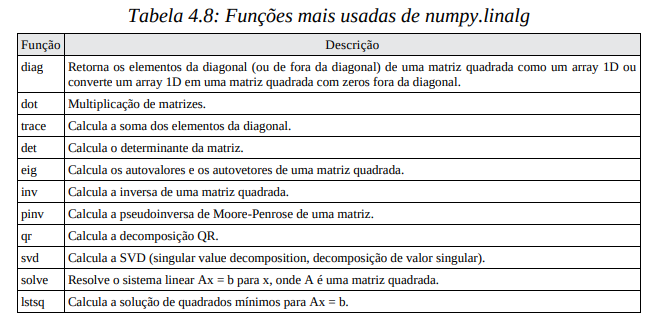

## 4.7 Exemplo: passeios aleatórios

A simulação de passeios aleatórios fornece uma aplicação ilustrativa da utilização de operações de arrays. 

Uma maneira em Python puro de implementar um único passeio aleatório com 1.000 passos usando o módulo interno `random`:

In [17]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
#! blockend

In [ ]:
plt.plot(walk[:100])

In [21]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [22]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(walk[:100])